### Readability

In [1]:
import readability
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
classification = ['Good','Bad','Inter']

In [3]:
home_path = '/home/guoy20/Data/json/'
result = {'Good':[],'Bad':[],'Inter':[]}

In [4]:
for c in classification:
    class_path = home_path + c
    filenames = os.listdir(class_path)
    c_class = []
    for file in filenames:
        l = []
        file_path = class_path +'/' + file
        try:
            with open(file_path) as user_file:
                file_contents = user_file.read()
            list_file = eval(file_contents)
            for line in list_file:
                text = list(line.values())[0]
                results = readability.getmeasures(text, lang='en')
                score = results['readability grades']['FleschReadingEase']
                l.append(score)
            
            c_class.append(sum(l)/len(l))
            
        except:
            continue
        result[c] = c_class

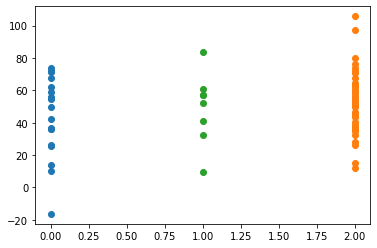

In [5]:
plt.scatter([0 for i in range(len(result['Good']))],result['Good'],label = 'good')
plt.scatter([2 for i in range(len(result['Bad']))],result['Bad'],label = 'bad')
plt.scatter([1 for i in range(len(result['Inter']))],result['Inter'],label = 'intermedia')

plt.show()

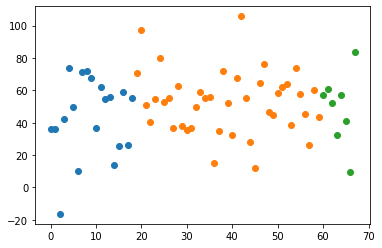

In [6]:
plt.scatter([i for i in range(len(result['Good']))],result['Good'],label = 'good')
plt.scatter([i + len(result['Good']) for i in range(len(result['Bad']))],result['Bad'],label = 'bad')
plt.scatter([i + len(result['Good']) + len(result['Bad']) for i in range(len(result['Inter']))],result['Inter'],label = 'intermedia')

plt.show()

In [7]:
for c in classification:
    print(c,"average score is",sum(result[c])/len(result[c]))

Good average score is 43.85613603782518
Bad average score is 52.894429967026866
Inter average score is 49.28640954613715


/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot`

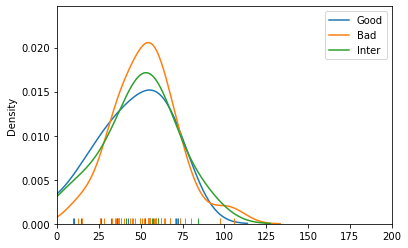

In [8]:
for c in classification:
    length = [i for i in result[c]]
    sns.distplot(length, rug=True, hist=False,label = c)
plt.legend()
plt.xlim(0,200)
plt.show()

In [9]:
from transformers import AutoTokenizer, DistilBertForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained('has-abi/distilBERT-finetuned-resumes-sections')

model = DistilBertForSequenceClassification.from_pretrained("has-abi/distilBERT-finetuned-resumes-sections")

In [10]:
text = 'Certified Public Accountant Certificate'

In [11]:
encoded_input = tokenizer(text, return_tensors='pt')

output = model(**encoded_input)

In [12]:
labels = ['awards',
          'certificates',
          'contact/name/title',
          'education',
          'interests',
          'languages',
          'para',
          'professional_experiences',
          'projects',
          'skills',
          'soft_skills',
          'summary']

In [13]:
torch.argmax(output.logits)

tensor(1)

In [14]:
result = {'Good':[],'Bad':[],'Inter':[]}
for c in classification:
    class_path = home_path + c
    filenames = os.listdir(class_path)
    c_class = []
    for file in filenames:
        d = {'awards':0,'certificates':0,'contact/name/title':0,'education':0,'interests':0,'languages':0,'para':0,'professional_experiences':0,'projects':0,'skills':0,'soft_skills':0,'summary':0}
        l = []
        file_path = class_path +'/' + file
        count = 0
        try:
            with open(file_path) as user_file:
                file_contents = user_file.read()
            list_file = eval(file_contents)
            for line in list_file:
                text = list(line.values())[0]
                encoded_input = tokenizer(text, return_tensors='pt')
                output = model(**encoded_input)
                
                label_id = torch.argmax(output.logits)
                label_id  = label_id.tolist()
                d[labels[label_id]] += 1
                count += 1
            
            
            for key in d:
                d[key]= d[key]/count
            result[c].append(d)
            
        except:
            continue

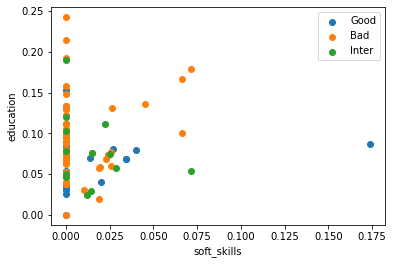

In [18]:
for c in classification:
    interest = [i['soft_skills'] for i in result[c]]
    education = [i['education'] for i in result[c]]    
    plt.scatter(interest,education,label = c)
plt.legend()
plt.ylabel('education')
plt.xlabel('soft_skills')
plt.show()

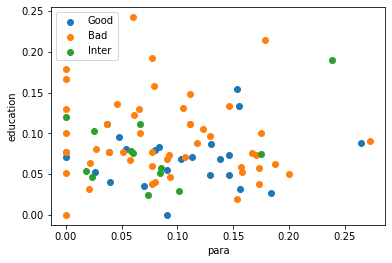

In [27]:
for c in classification:
    soft_skills = [i['para'] for i in result[c]]
    education = [i['education'] for i in result[c]]    
    plt.scatter(soft_skills,education,label = c)
plt.legend()
plt.ylabel('education')
plt.xlabel('para')
plt.show()